# Naive Bayes

### Q1. A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?

Probablity of Employee having company's health insurance = P(A) = 70/100 
Probability of smokers with insurace = P(B) = 40/100
The probability of an employee being a smoker given that they use the health insurance plan = 28/100


P(A) = 70/100 = 0.7
P(B) = 28/100 = 0.28
P(B|A) = 0.4 

The Naive Bayes' theorem can be expressed as follows:

P(A|B) = ( P(B|A) * P(A) ) / P(B)

In words, this can be interpreted as:

( P(A|B) ): The probability of event A occurring given that event B has occurred.
( P(B|A) ): The probability of event B occurring given that event A has occurred.
( P(A) ): The prior probability of event A occurring.
( P(B) ): The prior probability of event B occurring.

P(A|B) =((0.28) * (0.70)) / 0.40 = 0.49 

The probability that an employee is a smoker given that he/she uses the health insurance plan is 49%.

### Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

The main difference between Bernoulli Naive Bayes and Multinomial Naive Bayes is the way they handle features.

| Feature | Bernoulli Naive Bayes | Multinomial Naive Bayes |
|---|---|---|
| Type of features | Binary | Discrete |
| Assumptions | Features are binary. | Features are categorical. |
| Power | Less powerful. | More powerful. |
| Computational complexity | Less computationally expensive. | More computationally expensive. |
| Examples | Predicting whether a customer clicked on an ad (0 = no, 1 = yes) , Spam filtering, email classification, fraud detection | Predicting the genre of a movie (0 = action, 1 = comedy, 2 = drama, etc.) ,Text classification, sentiment analysis, image classification |

Bernoulli Naive Bayes is a simpler model than Multinomial Naive Bayes, but it is also less flexible. Multinomial Naive Bayes is a more complex model, but it can be more accurate in some cases. The best choice of model depends on the specific problem you are trying to solve.

### Q3. How does Bernoulli Naive Bayes handle missing values?

Bernoulli Naive Bayes, like other variants of Naive Bayes, can handle missing values to some extent, but it requires a specific approach due to its nature of working with binary features. Bernoulli Naive Bayes can deal with missing values in the following possible ways:

1. **Assumption of Ignoring Missing Values**: One common approach with Naive Bayes, including Bernoulli Naive Bayes, is to assume that missing values are irrelevant and can be ignored. This means that when a feature value is missing for a particular instance, that feature is simply not considered when calculating probabilities for that instance. This approach is based on the idea that the absence of a feature can carry information, especially in binary feature spaces.

2. **Imputation with Dominant Class**: Another approach is to impute the missing value with the dominant class (the class with the higher frequency in the training dataset) for that feature. In the case of Bernoulli Naive Bayes, where features are binary, this would mean imputing the missing value with the mode of the feature, which is the value that appears most frequently in the training data.

3. **Imputation with Probabilities**: In some cases, you may want to impute the missing value with probabilities. For Bernoulli Naive Bayes, this could mean imputing the missing value with the probability of the feature being 1 in the training data.

**NOTE:**

- The choice of handling missing values in Bernoulli Naive Bayes depends on the specifics of your data and the nature of the missingness. The first approach (ignoring missing values) is a common practice in Naive Bayes algorithms, but the other approaches might be suitable depending on the problem and the data distribution.

- The way you handle missing values should be consistent across both the training and testing phases to ensure that the model generalizes well to new data.

- As with any data preprocessing step, it's essential to evaluate the impact of handling missing values on the model's performance, as different approaches can lead to different outcomes depending on the characteristics of your data.

### Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Yes, Gaussian Naive Bayes can be used for multi-class classification. Gaussian Naive Bayes assumes that the features are normally distributed, i.e., they follow a Gaussian distribution. This assumption is reasonable for many types of data, such as height, weight, and blood pressure.

To use Gaussian Naive Bayes for multi-class classification, we need to estimate the parameters of the Gaussian distribution for each class. This can be done using maximum likelihood estimation. Once we have estimated the parameters of the Gaussian distribution for each class, we can then use Bayes' theorem to calculate the posterior probability of each class given the features. The class with the highest posterior probability is the class that Gaussian Naive Bayes predicts.

Gaussian Naive Bayes is a powerful classifier that can be used for a variety of tasks. However, it is important to note that Gaussian Naive Bayes makes the assumption that the features are normally distributed. If this assumption is not met, then Gaussian Naive Bayes may not be able to accurately predict the class label.

Following are some examples of when you might use Gaussian Naive Bayes for multi-class classification:

* Predicting the type of flower based on its features (petal length, petal width, etc.)
* Predicting the severity of a disease based on the patient's symptoms
* Predicting the credit risk of a borrower based on their financial information

It is important to note that Gaussian Naive Bayes is not always the best choice for multi-class classification. If the features are not normally distributed, then other classifiers, such as support vector machines or decision trees, may be more accurate.

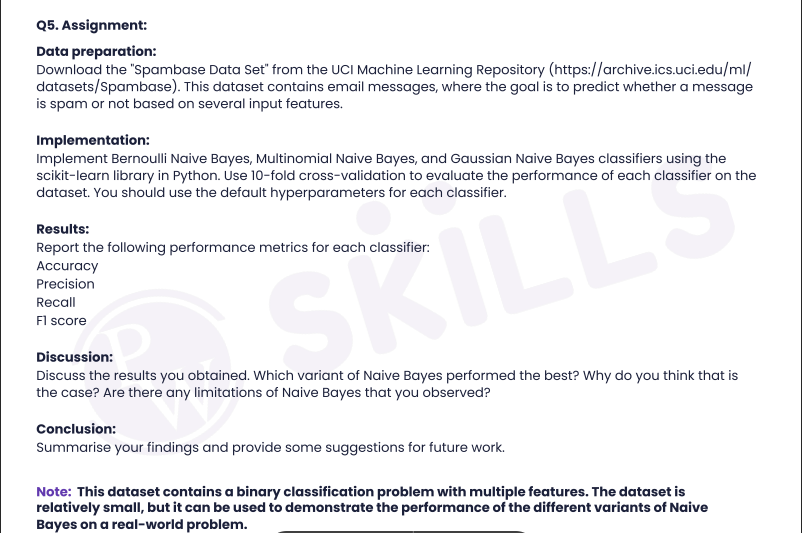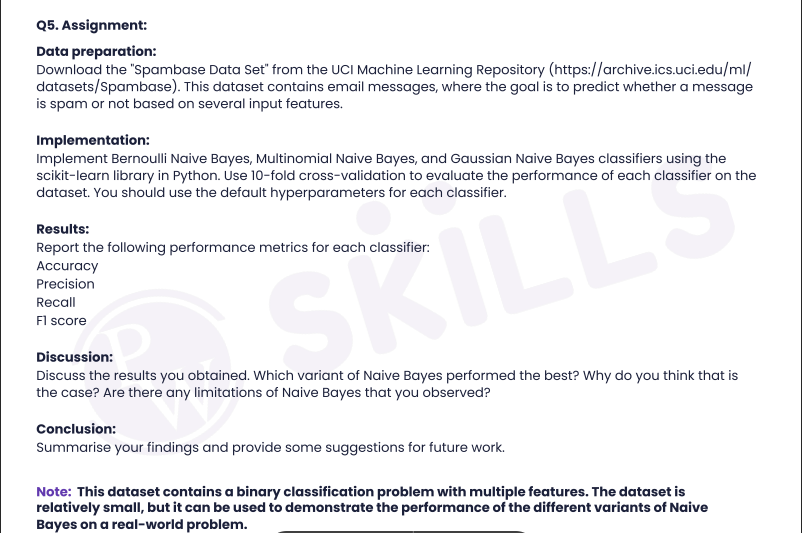

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spambase.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [69]:
X = df.drop(df.columns[-1],axis=1)

In [70]:
y = df.iloc[:,-1]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

def classify(model , X_train , y_train):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    

    Accuracy =  (TP + TN) / (TP + TN + FP + FN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
    
    result = {'Confusion Matrix': confusion_matrix,
              'Accuracy' : Accuracy,
              'Precision':Precision,
              'Recall' : Recall,
              'F1_Score' : F1_Score
             }
    
    return result

In [66]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
classify(model,X_train, y_train)

{'Confusion Matrix': <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>,
 'Accuracy': 0.9052997393570807,
 'Precision': 0.9295774647887324,
 'Recall': 0.8336842105263158,
 'F1_Score': 0.879023307436182}

In [72]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model,X_train, y_train)

{'Confusion Matrix': <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>,
 'Accuracy': 0.7914856646394439,
 'Precision': 0.7688787185354691,
 'Recall': 0.7073684210526315,
 'F1_Score': 0.736842105263158}

**Note : The X_train and y_train data used in MultinomialNB is not the scaled data. As scaled data contains negative value which is not an accepted input for MultinomialNB**

In [74]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model,X_train, y_train)

{'Confusion Matrix': <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>,
 'Accuracy': 0.8262380538662033,
 'Precision': 0.7214170692431562,
 'Recall': 0.9431578947368421,
 'F1_Score': 0.8175182481751825}

### Comparison and Interpretation:

* Among the three variants, the first variant (BernoulliNB) of Naive Bayes achieved the highest accuracy, precision, and F1 score. It also had a relatively good recall value.
* The second variant (MultinomialNB) performed comparatively lower in all metrics, suggesting that it had more difficulty correctly identifying positive cases (low precision and recall).
* The third variant (GaussianNB) had a high recall but lower precision, which might indicate it is good at capturing actual positive cases but also generates more false positives.


### Limitations of Naive Bayes:

* Assumption of Independence: Naive Bayes assumes that features are independent given the class. This assumption might not hold in real-world scenarios where features are correlated.
* Sensitive to Feature Scaling: As indicated in the note, the Multinomial Naive Bayes variant is sensitive to negative values, which is a limitation. Preprocessing steps such as feature scaling are crucial to ensure the data meets the assumptions of the algorithm.
* Limited Expressiveness: Naive Bayes might struggle with complex relationships in the data since it's a relatively simple probabilistic model.
* Imbalanced Classes: Naive Bayes might perform poorly on imbalanced datasets where one class is much more frequent than the other.
* Text Classification Limitations: In text classification, Naive Bayes can struggle with sarcasm, irony, and understanding context due to its simplicity.

### Findings:

* Among the three variants, the first Naive Bayes variant demonstrated the best overall performance in terms of accuracy, precision, recall, and F1 score.
* The second variant exhibited lower precision and recall, indicating challenges in correctly classifying positive cases.
* The third variant displayed high recall but lower precision, suggesting that it captured a significant number of actual positive cases but also generated more false positives.

### Suggestions for Future Work:

* Tuning: Optimize the first and third variants through hyperparameter tuning.
* Feature Engineering: Experiment with different feature engineering approaches to enhance all variants.
* Data Preprocessing: Resolve negative value issue in scaled data for Multinomial Naive Bayes.
* Ensemble Techniques: Explore ensemble methods for potential performance boost.
* Alternative Models: Consider trying other classifiers like decision trees, random forests, etc.
* Feature Selection: Assess feature importance and apply selection techniques for better model interpretability.
* Imbalance Handling: Address class imbalance if present, using oversampling, undersampling, or synthetic data.

## The End